## Problem Statement:

Digital marketing campaigns often struggle to accurately predict which customers will convert, leading to wasted advertising money and missed opportunities. This project aims to build a machine learning model that uses customer data to predict conversions. By identifying likely converters, the model will help improve targeting, reduce costs, and increase the success of marketing efforts.



## Digital Marketing Campaign Dataset
- Description: This dataset includes comprehensive data from a digital marketing campaign, encompassing customer demographics, campaign details, engagement metrics, and conversion outcomes. It aims to provide insights into the effectiveness of various marketing strategies and customer interactions.

- Columns: The dataset features attributes such as CustomerID, Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, AdvertisingPlatform, AdvertisingTool, and Conversion.

- Purpose: This dataset is used to analyze the impact of different digital marketing channels and strategies on customer behavior and conversion rates. It helps in understanding factors that drive customer engagement and sales.

- Applications: The data can be utilized for customer segmentation, channel effectiveness analysis, conversion optimization, and personalizing marketing strategies.

- Analysis Tasks: Key tasks include exploratory data analysis (EDA), data preprocessing, building predictive models to forecast customer responses, and optimizing ad spend based on performance metrics.

- Relevance: This dataset is relevant for data science applications in digital marketing, providing actionable insights for improving campaign effectiveness and maximizing return on investment (ROI).

## Step 1 Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score,precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
import joblib
from collections import Counter
import datetime as dt
warnings.filterwarnings('ignore')


### Step 2 Basic Understanding of The Data

In [6]:
df = pd.read_csv(r"C:\Users\revea\Data Science\Python_workspace\BIA Data Science Project\Digital_marketing_campaign\digital_marketing_campaign_dataset.csv")

In [7]:
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

## Here's an explanation of each column in the dataset:

| __Name__               | __Description__ |
|------------------------|-----------------|
| __CustomerID__         | A unique identifier for each customer. |
| __Age__                | The age of the customer. |
| __Gender__             | The gender of the customer, typically categorized as 'Male' or 'Female'. |
| __Income__             | The annual income of the customer. |
| __CampaignChannel__    | The marketing channel through which the campaign was delivered (e.g., Social Media, Email, PPC). |
| __CampaignType__       | The type of marketing campaign (e.g., Awareness, Retention, Conversion). |
| __AdSpend__            | The amount of money spent on the advertisement. |
| __ClickThroughRate__   | The percentage of customers who clicked on the advertisement out of the total who viewed it. |
| __ConversionRate__     | The percentage of customers who completed a desired action (e.g., purchase) after engaging with the campaign. |
| __WebsiteVisits__      | The number of times the customer visited the website. |
| __PagesPerVisit__      | The average number of pages viewed per visit. |
| __TimeOnSite__         | The total time the customer spent on the website during visits, typically measured in minutes. |
| __SocialShares__       | The number of times the campaign was shared on social media. |
| __EmailOpens__         | The number of times the customer opened marketing emails. |
| __EmailClicks__        | The number of times the customer clicked on links in marketing emails. |
| __PreviousPurchases__  | The number of purchases the customer made before the current campaign. |
| __LoyaltyPoints__      | Points accumulated by the customer through a loyalty program. |
| __AdvertisingPlatform__| The platform used for advertising (e.g., 'IsConfid'). |
| __AdvertisingTool__    | The specific tool or service used for the campaign (e.g., 'ToolConfid'). |
| __Conversion__         | A binary indicator of whether the customer converted (1 for conversion, 0 for no conversion). |


In [10]:
df.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

### Descriptive Statistics of Numerical Values
- __`CustomerID`__: The dataset includes 8,000 unique customers, with IDs ranging from 8,000 to 15,999.
- __`Age`__: The average age of customers is approximately 43.6 years, with the youngest being 18 and the oldest 69 year
- __`Income`__: The average income of customers is about $84,664, with the lowest income being $20,014 and the highest $1497.91.
- __`ClickThroughRate`__: On average, 15.5% of advertisements result in clicks, with rates ranging from 1% to 29.9%.
- __`ConversionRate`__: The average conversion rate is 10.4%, with a minimum of 1% and a maximum of 20%.
- __`WebsiteVisits`__: Customers visit the website on average 24.75 times, with visits ranging from 0 to 49.
- __`PagesPerVisit`__: On average, customers view 5.55 pages per visit, with a minimum of 1 page and a maximum of 10 pages.
- __`TimeOnSite`__: The average time spent on the site is approximately 7.73 minutes, ranging from 0.5 to 15 minutes.
- __`SocialShares`__: Customers share content on social media an average of 49.8 times, with a range from 0 to 99 shares.
- __`EmailOpens`__: On average, customers open emails 9.48 times, with a range from 0 to 19 times.
- __`EmailClicks`__: Customers click on email links 4.47 times on average, with a range from 0 to 9 clicks.
- __`PreviousPurchases`__: Customers have made an average of 4.49 previous purchases, with a range from 0 to 9 purchases.
- __`LoyaltyPoints`__: Customers have an average of 2,490.27 loyalty points, with a range from 0 to 4,999 points.
- __`Conversion`__: The average conversion rate is 0.88, with a minimum of 0 and

- __`AdSpend`__: The average spending on advertisements is approximately $5,001, with a minimum of $100.05 and a maximum of $9,997.91.
 a maximum of 1.
a maximum of 1.


In [12]:
df.describe(include='object')

Gender CampaignChannel CampaignType AdvertisingPlatform  \
count     8000            8000         8000                8000   
unique       2               5            4                   1   
top     Female        Referral   Conversion            IsConfid   
freq      4839            1719         2077                8000   

       AdvertisingTool  
count             8000  
unique               1  
top         ToolConfid  
freq              8000

### Descriptive Statistics for Categorical Columns

- __`Gender`__: The dataset includes 8,000 entries, with 2 unique values. The most frequent value is 'Female', which appears 4,839 times.
- __`CampaignChannel`__: There are 8,000 entries with 5 unique channels. The most common channel is 'Referral', which is used 1,719 times.
- __`CampaignType`__: The dataset includes 8,000 entries with 4 unique types. The most frequent type is 'Conversion', appearing 2,077 times.
- __`AdvertisingPlatform`__: All 8,000 entries use a single platform, 'IsConfid'.
- __`AdvertisingTool`__: All 8,000 entries use a single tool, 'ToolConfid'.


In [14]:
df.isnull().sum()
#seems like there is no missing value in the data so we wont need to drop or fill any value

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [15]:
df['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

In [16]:
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts()

Gender
Female    4839
Male      3161
Name: count, dtype: int64

# Step 3 Dataset Cleaning, Preparation and outliers Handling


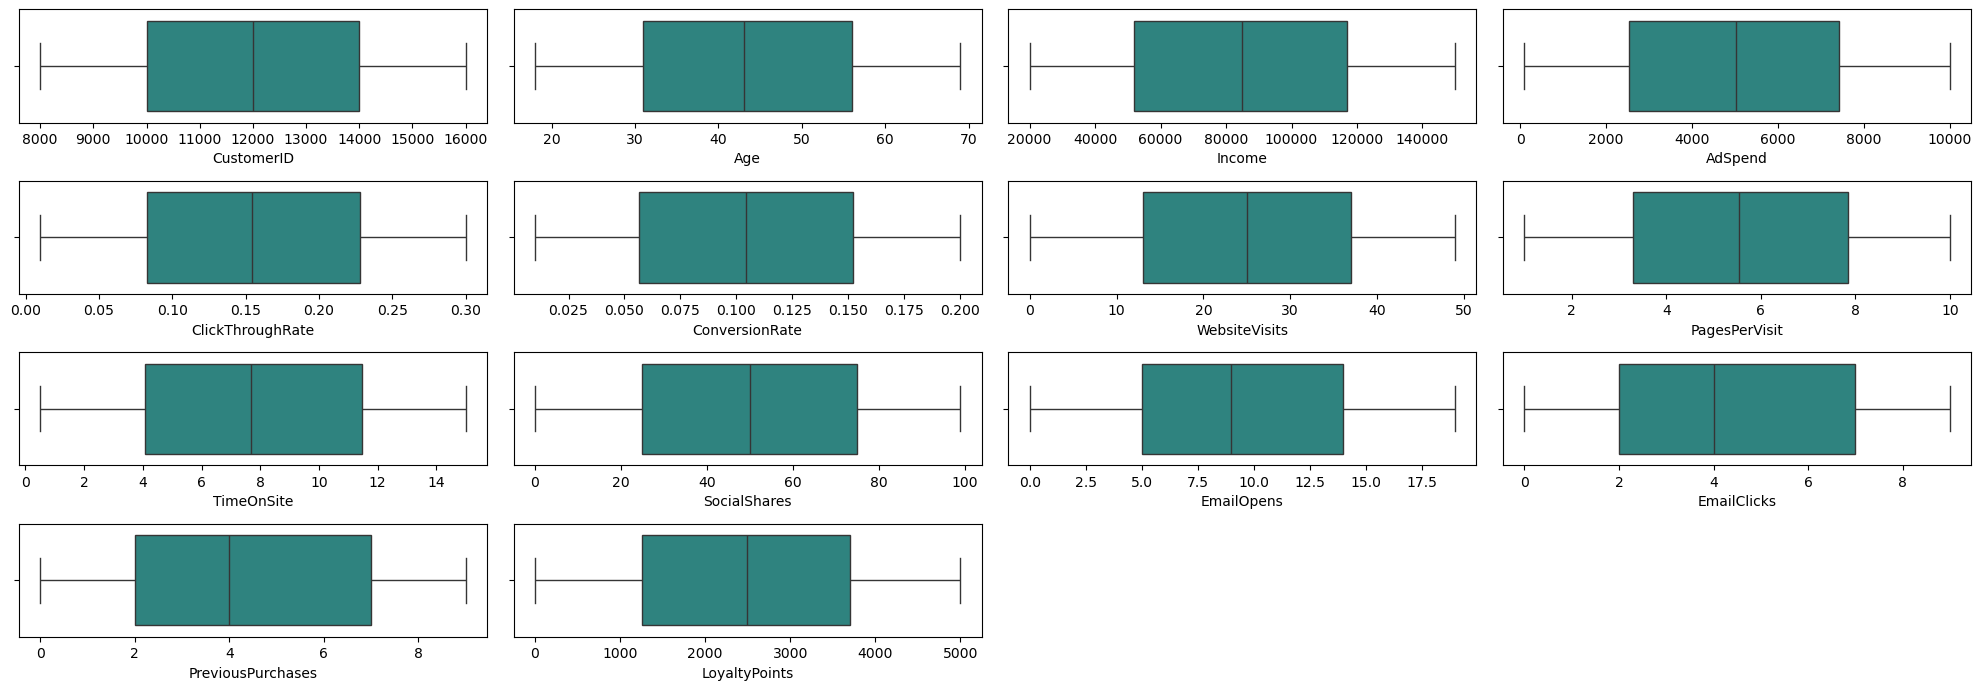

In [19]:
### since the there is no null value in the data now i will check the outliers 
data = df.drop(columns='Conversion')
plt.figure(figsize = (20, 10))
x = 1 

for column in data.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[column],orient='h',palette='viridis')
    plt.ylabel('') 
    x+=1
    
plt.tight_layout()

# we can see that there are no outliers in  the columns that means the data is clean and we can go 

In [20]:
df.to_csv(r'C:\Users\revea\Data Science\Python_workspace\BIA Data Science Project\Digital_marketing_campaign\hotel_cleaned.csv' ,index= False)
#since the data has been cleaned it has no more missing value and some randomness to the data we will export this data 
# and do an exploratory data analysis 
# towards the data 

In [21]:
df = pd.read_csv(r'C:\Users\revea\Data Science\Python_workspace\BIA Data Science Project\Digital_marketing_campaign\hotel_cleaned.csv')
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

### Conclusion

1. Missing Values: No missing values were found in the dataset, which eliminated the need for imputation or removal of data.

2. Outliers Handling: A detailed examination of the dataset for outliers revealed none, indicating that the data is clean and consistent. This was confirmed using box plots for each numerical column, ensuring there were no extreme values that could skew the analysis.

3. Data Export: The cleaned dataset was exported for further exploratory data analysis, ensuring that the data was ready for in-depth analysis and model building without the risk of inaccuracies due to missing values or outliers.

In summary, the dataset was found to be complete and consistent, allowing for a robust analysis and model development process without concerns about data quality issues.

# Step 4 Exploratory Data Analysis

## Univariate Analysis

#### Campaign Channel Type

In [26]:
df.stb.freq(['CampaignChannel'], cum_cols=False)

#'Referral' and 'Email' are the most frequently used channels, indicating they might be the most effective or preferred methods in the marketing campaigns.
# we will se it later on how this affect conversion 

CampaignChannel  count  percent
0        Referral   1719  21.4875
1             PPC   1655  20.6875
2           Email   1557  19.4625
3             SEO   1550  19.3750
4    Social Media   1519  18.9875

#### CampaignType

In [28]:
df.stb.freq(['CampaignType'], cum_cols=False)

# ### Insights

#  1. **Dominant Campaign Type**:
#    - __`Conversion`__: The 'Conversion' campaign type is the most frequently used, with 2,077 occurrences. This indicates a strong focus on converting leads into customers.

# 2. **Focus on Awareness and Engagement**:
#    - __`Awareness`__: The 'Awareness' campaign type is the second most frequent, with 2,031 occurrences, followed closely by 'Engagement' with 1,974 occurrences. This shows that raising awareness and engaging with the audience are also significant priorities.

# 3. **Retention Efforts**:
#    - __`Retention`__: The 'Retention' campaign type, although the least frequent among the listed types, still has a substantial number of occurrences (1,918). This suggests that retaining existing customers is an important aspect of the marketing strategy.

# 4. **Balanced Strategy**:
#    - The frequencies are relatively close to each other, indicating a balanced marketing strategy that includes efforts to convert, engage, retain, and raise awareness among the target audience.

CampaignType  count  percent
0     Conversion   2077  25.9625
1  Consideration   1988  24.8500
2      Awareness   1988  24.8500
3      Retention   1947  24.3375

In [29]:
df.stb.freq(['PreviousPurchases'], cum_cols=False)

# Insights
# Common Purchase Frequencies:
# The most common number of previous purchases is 3, followed by 4 and 5. This suggests that many customers make multiple repeat purchases, indicating a level of satisfaction and loyalty.

# High Repeat Purchase Rates:
# A significant number of customers have made 2 or more previous purchases, highlighting strong repeat purchase behavior. This could be a sign of successful customer retention strategies.

# New Customers:
# There are 500 instances where customers have not made any previous purchases. This represents new customers or one-time buyers, and efforts might be needed to convert them into repeat buyers.

# Loyal Customers:
# Customers with 6 or more previous purchases are fewer in number but represent a loyal customer base. These customers can be targeted with loyalty programs and special offers to maintain their loyalty.


PreviousPurchases  count  percent
0                  0    838  10.4750
1                  3    822  10.2750
2                  9    819  10.2375
3                  6    818  10.2250
4                  4    797   9.9625
5                  8    796   9.9500
6                  1    794   9.9250
7                  5    779   9.7375
8                  2    773   9.6625
9                  7    764   9.5500

#### PreviousPurchases and Conversion 

In [31]:
pd.crosstab(df['PreviousPurchases'], df['Conversion'], normalize = 'index')

# Higher Conversion Rates with More Purchases: If the proportion of conversions (value under the column '1') increases with the number of previous 
# purchases, it suggests that customers who have purchased before are more likely to convert again.

# Low Conversion Rates with Few Purchases: If customers with zero or few previous purchases show lower conversion rates, 
# this could indicate an opportunity to improve retention or re-engage strategies for these segments.

# Consistent Conversion Rates: If the conversion rate is relatively consistent across different numbers of previous purchases, 
# this might suggest that previous purchasing behavior is not a strong predictor of future conversions.

Conversion                0         1
PreviousPurchases                    
0                  0.226730  0.773270
1                  0.245592  0.754408
2                  0.093144  0.906856
3                  0.092457  0.907543
4                  0.072773  0.927227
5                  0.106547  0.893453
6                  0.102689  0.897311
7                  0.085079  0.914921
8                  0.095477  0.904523
9                  0.108669  0.891331

In [32]:
pd.crosstab(df['CampaignChannel'], df['Conversion'], normalize = 'index').sort_values(1, ascending = False)

# Top-Performing Channels: Channels with higher conversion rates (higher proportion under the '1' column) are the most effective in converting customers.
# Improvement Opportunities: Channels with lower conversion rates may need optimization, such as better targeting or improved messaging.
# Resource Allocation: Focus more resources on channels with high conversion rates to maximize ROI.
# Audience Behavior: Understanding which channels perform best helps in tailoring strategies to audience preferences.

Conversion              0         1
CampaignChannel                    
Referral         0.116928  0.883072
PPC              0.117221  0.882779
SEO              0.123226  0.876774
Email            0.129737  0.870263
Social Media     0.131666  0.868334

In [33]:
pd.crosstab(df['CampaignType'], df['Conversion'], normalize = 'index').sort_values(1, ascending = False)

# Effective Campaign Types: The campaign types listed at the top have the highest conversion rates, indicating they are the most effective in driving customer conversions.
# Optimization Opportunities: Campaign types with lower conversion rates may require adjustments or optimizations to improve their effectiveness.
# Resource Allocation: You may want to allocate more budget and focus to the campaign types with higher conversion rates to maximize overall marketing success.
# Targeted Strategy Development: Understanding which campaign types convert best can help tailor future campaigns to leverage these successful strategies.

Conversion            0         1
CampaignType                     
Conversion     0.066442  0.933558
Retention      0.141757  0.858243
Awareness      0.144366  0.855634
Consideration  0.144366  0.855634

### Visualization

###### Conversion Rate by Campaign Channel: Visualize how conversion rates vary across different campaign channels.



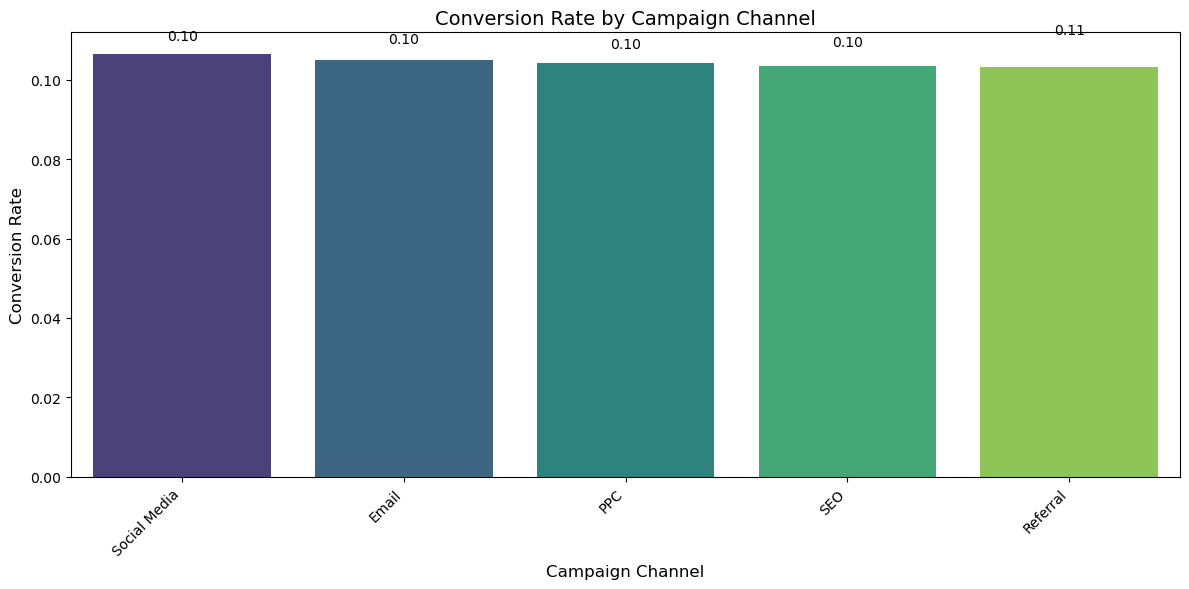

In [36]:
# Calculate the mean conversion rate for each campaign channel
channel_conversion = df.groupby('CampaignChannel')['ConversionRate'].mean().reset_index()

# Sort the data by conversion rate
channel_conversion = channel_conversion.sort_values(by='ConversionRate', ascending=False)

# Create a bar plot with sorted channels and customizations
plt.figure(figsize=(12, 6))
sns.barplot(x='CampaignChannel', y='ConversionRate', data=channel_conversion, palette='viridis')

# Add data labels
for index, row in channel_conversion.iterrows():
    plt.text(index, row.ConversionRate + 0.005, f"{row.ConversionRate:.2f}", color='black', ha="center")

# Customize labels and title
plt.xlabel("Campaign Channel", fontsize=12)
plt.ylabel("Conversion Rate", fontsize=12)
plt.title("Conversion Rate by Campaign Channel", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

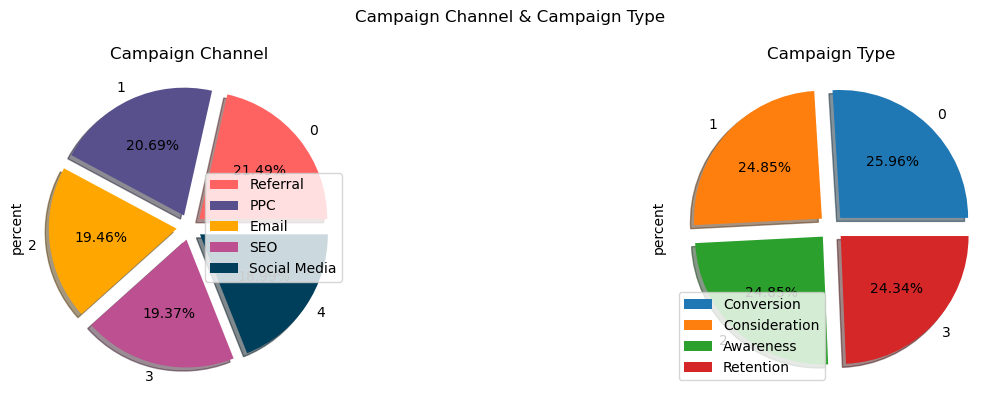

In [37]:
CampaignType = df.stb.freq(['CampaignType'], cum_cols=False)
CampaignChannel = df.stb.freq(['CampaignChannel'], cum_cols=False)

# Define vibrant color palettes
colors_channel = ['#ff6361', '#58508d', '#ffa600', '#bc5090', '#003f5c', '#ff6f61', '#ffa07a']
colors_type = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(15, 4))

# Plot for CampaignChannel
plt.subplot(1, 2, 1)
explode_channel = [0.1] * len(CampaignChannel)  # Adjust length to number of categories
CampaignChannel['percent'].plot.pie(explode=explode_channel, 
                                    autopct='%1.2f%%',
                                    shadow=True,
                                    colors=colors_channel)
plt.legend(CampaignChannel['CampaignChannel'])
plt.title('Campaign Channel')

# Plot for CampaignType
plt.subplot(1, 2, 2)
explode_type = [0.1] * len(CampaignType)  # Adjust length to number of categories
CampaignType['percent'].plot.pie(explode=explode_type, 
                                 autopct='%1.2f%%',
                                 shadow=True,  
                                 colors=colors_type)
plt.legend(CampaignType['CampaignType'])
plt.title('Campaign Type')

plt.suptitle('Campaign Channel & Campaign Type')
plt.tight_layout()
plt.show()

### Gender

Text(0.5, 1.0, 'Gender')

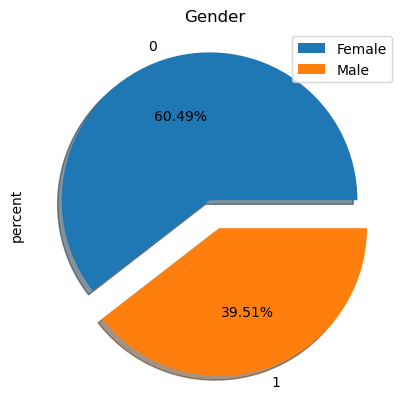

In [39]:
gender = df.stb.freq(['Gender'],cum_cols = False)

explode_channel = [0.1] * len(gender)  # Adjust length to number of categories
gender['percent'].plot.pie(explode=explode_channel, 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(gender['Gender'])
plt.title('Gender')


### The Distribution of Income

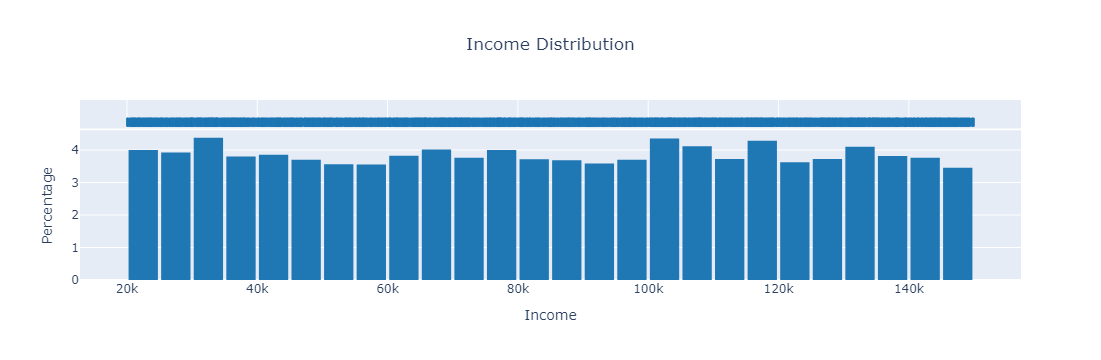

In [41]:
# Improved histogram for 'Income' distribution
fig = px.histogram(df, x="Income",
                   title='Income Distribution',
                   nbins=50,  # Increase the number of bins for finer granularity
                   color_discrete_sequence=['#1f77b4'],  # Set a specific color for the histogram bars
                   marginal='rug',  # Add a rug plot for additional detail
                   histnorm='percent')  # Normalize the histogram to show percentage

# Update layout for better readability
fig.update_layout(
    xaxis_title='Income',
    yaxis_title='Percentage',
    title_x=0.5,  # Center the title
    bargap=0.1  # Small gap between bars
)

fig.show()

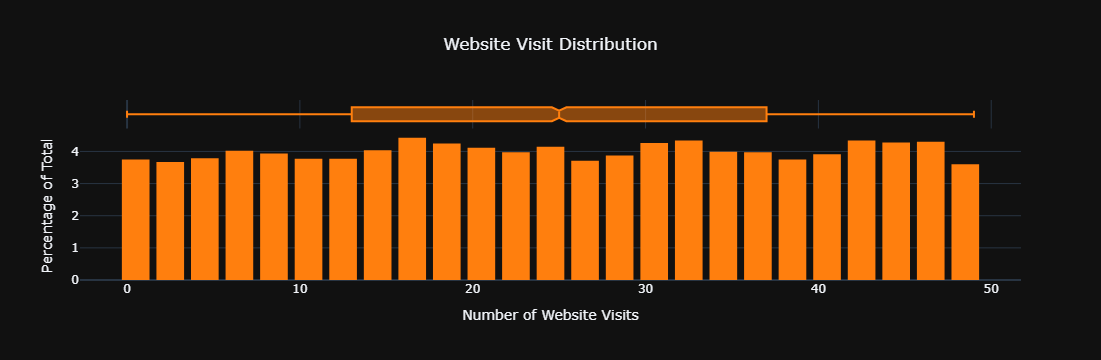

In [42]:
# Alternative histogram for 'WebsiteVisits' distribution
fig = px.histogram(df, x="WebsiteVisits",
                   title='Website Visit Distribution',
                   nbins=30,  # Adjust number of bins for different granularity
                   color_discrete_sequence=['#ff7f0e'],  # Use a different color for the bars
                   marginal='box',  # Use a box plot instead of a rug plot
                   histnorm='percent')  # Normalize to show percentages

# Update layout for better readability and aesthetics
fig.update_layout(
    xaxis_title='Number of Website Visits',
    yaxis_title='Percentage of Total',
    title_x=0.5,  # Center the title
    bargap=0.2,  # Larger gap between bars
    template='plotly_dark'  # Use a dark theme for a different visual style
)

fig.show()

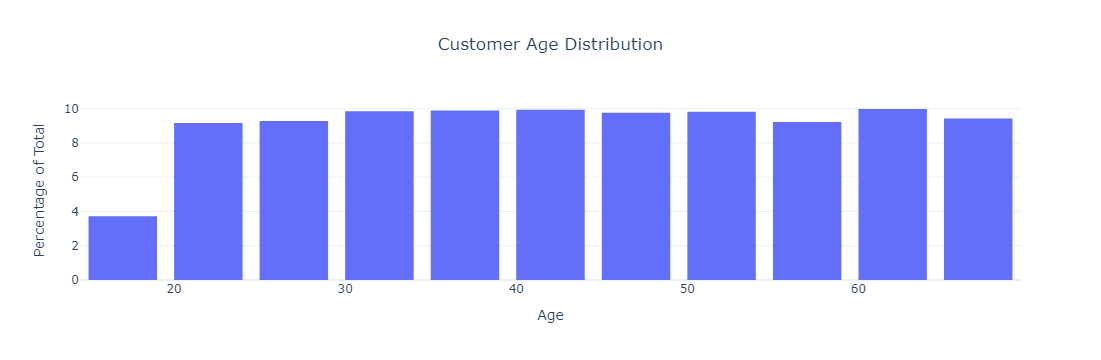

In [43]:
import plotly.express as px

# Create a histogram for 'Age' distribution
fig = px.histogram(df, x="Age",
                   title='Customer Age Distribution',
                   nbins=20,  # Number of bins for the histogram
                   color_discrete_sequence=['#636EFA'],  # Choose a color for the bars
                   histnorm='percent')  # Normalize to show percentages

# Update layout for better readability and aesthetics
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Percentage of Total',
    title_x=0.5,  # Center the title
    bargap=0.2,  # Gap between bars
    template='plotly_white'  # Clean, light theme
)

fig.show()


##### Channel-Specific Demographics: To analyze customer demographics by campaign channel, create a bar plot or a grouped bar plot.

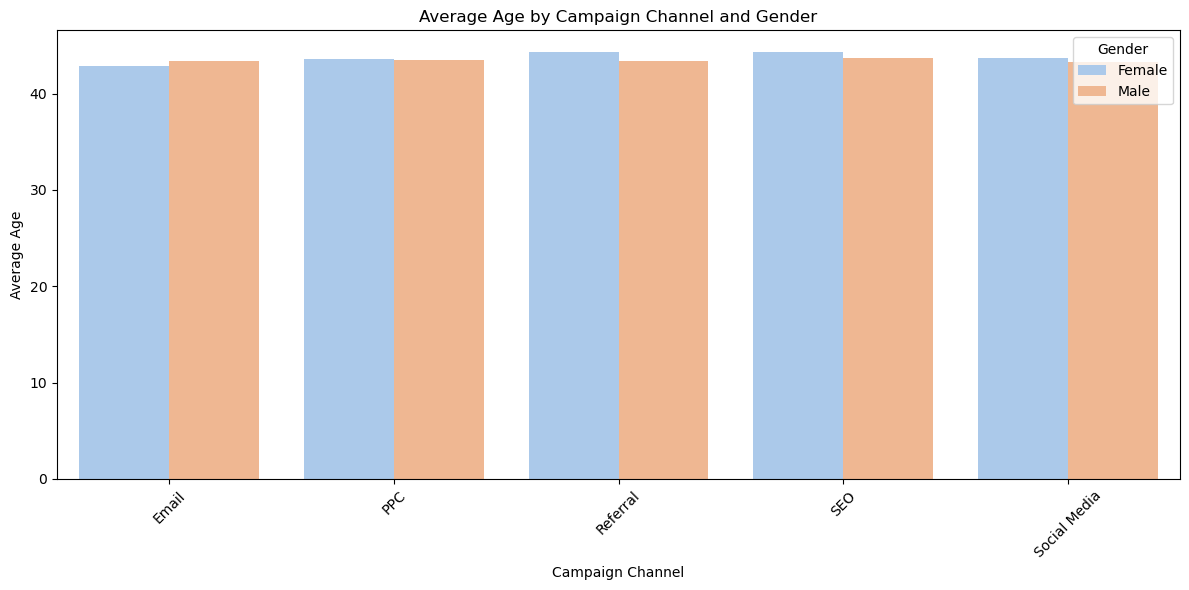

In [45]:
mean_age = df.groupby(['CampaignChannel', 'Gender'])['Age'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Create the grouped bar plot
sns.barplot(x='CampaignChannel', y='Age', hue='Gender', data=mean_age, palette='pastel')

plt.xlabel("Campaign Channel")
plt.ylabel("Average Age")
plt.title("Average Age by Campaign Channel and Gender")
plt.legend(title="Gender")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

plt.show()

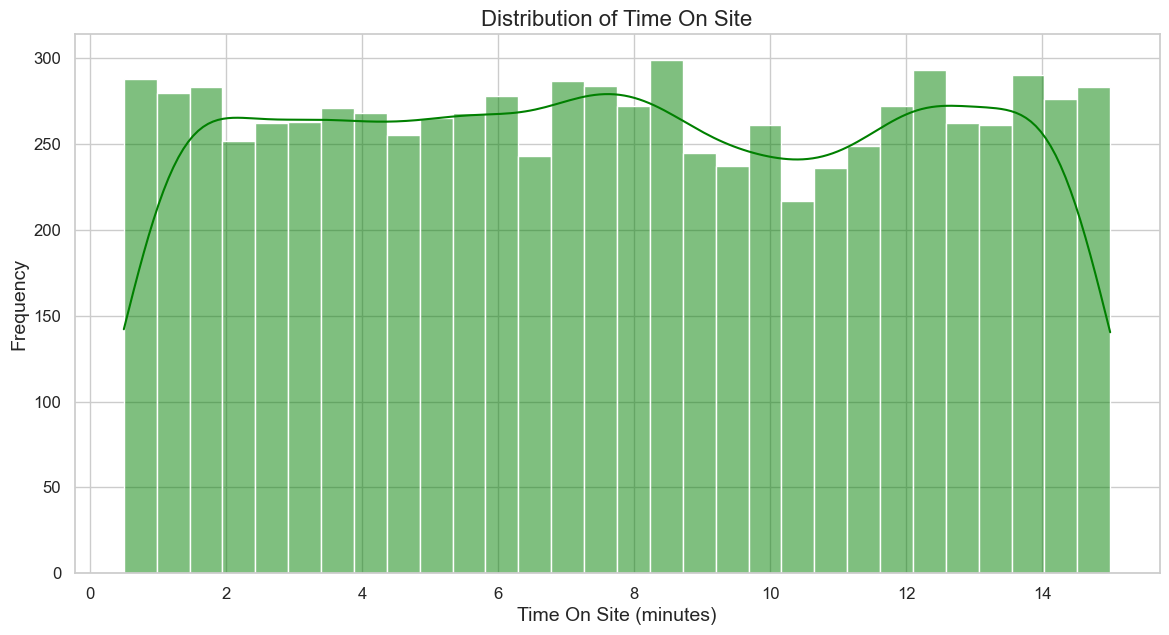

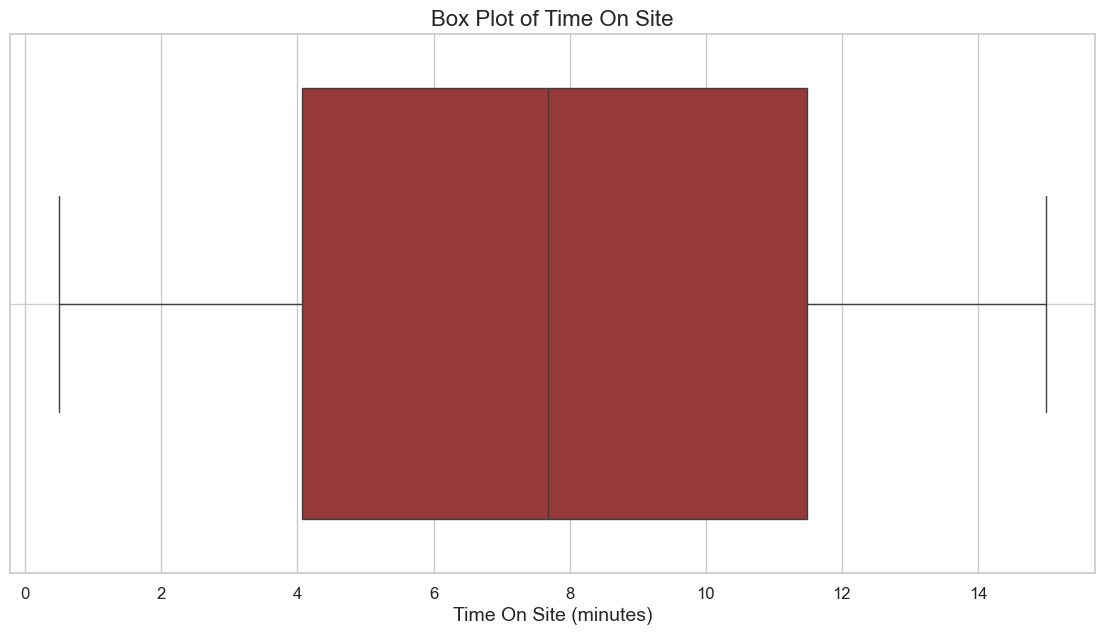

In [46]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a histogram with KDE
plt.figure(figsize=(14, 7))
sns.histplot(df['TimeOnSite'], bins=30, kde=True, color='green', edgecolor='white')
plt.title('Distribution of Time On Site', fontsize=16)
plt.xlabel('Time On Site (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Create a simple box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x=df['TimeOnSite'], color='brown')
plt.title('Box Plot of Time On Site', fontsize=16)
plt.xlabel('Time On Site (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

* Most users spend between 3 to 7 minutes on the site, with a median time of around 5 minutes. This suggests that the typical session length is relatively short.
  
* The right-skewed distribution suggests that while most users have shorter sessions, there are a few who spend a lot of time on the site. Understanding what keeps these users engaged could provide valuable insights for improving user experience.
  
* If the goal is to increase the average time spent on the site, targeted strategies could be implemented to engage users who spend less time. Personalized content, interactive features, or improved site navigation could be potential areas for enhancement.

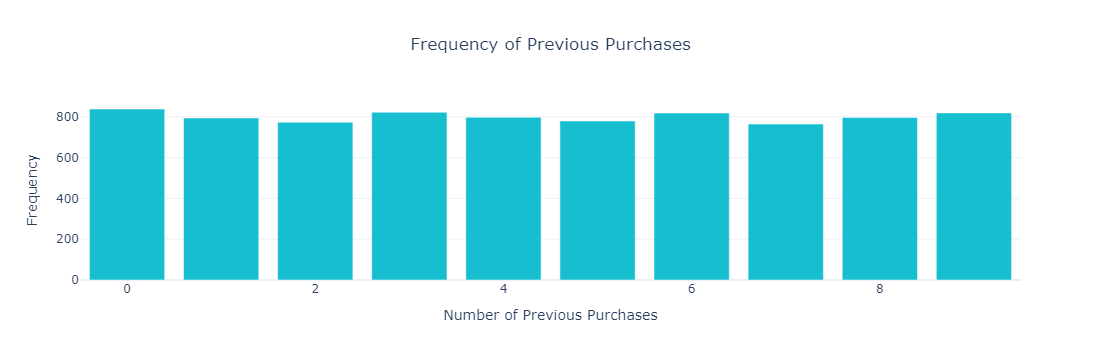

In [48]:
# Create a bar plot for 'PreviousPurchases' frequency
fig = px.bar(df, x=df['PreviousPurchases'].value_counts().index,
             y=df['PreviousPurchases'].value_counts().values,
             title='Frequency of Previous Purchases',
             labels={'x': 'Number of Previous Purchases', 'y': 'Frequency'},
             color_discrete_sequence=['#17BECF'])

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Previous Purchases',
    yaxis_title='Frequency',
    title_x=0.5,  # Center the title
    template='plotly_white'  # Clean, light theme
)

fig.show()



* Higher bars represent purchase frequencies that are more typical, while lower bars indicate less common purchase frequencies. This helps us understand what most customers' buying behaviors look like and can guide us in targeting our marketing efforts more effectively."

## Customer Retention Metrics

In [51]:
returning_visitors = len(df[df['WebsiteVisits'] > 1])
print(f"Number of Returning Visitors: {returning_visitors}")

Number of Returning Visitors: 7700


Returning Visitors: There are 7,700 returning visitors, indicating a healthy level of customer engagement and suggesting that a significant portion of the audience finds value in revisiting the site.

#### 2. Email Engagement: Measure email opens, clicks, and conversions based on available data (e.g., ‘EmailOpens’, ‘EmailClicks’, ‘Conversion’).

In [54]:
avg_email_opens = df['EmailOpens'].mean()
avg_email_clicks = df['EmailClicks'].mean()
print(f"Avg. Email Opens: {avg_email_opens:.2f}")
print(f"Avg. Email Clicks: {avg_email_clicks:.2f}")

Avg. Email Opens: 9.48
Avg. Email Clicks: 4.47


Email Engagement:

1 .The average number of email opens is 9.48.
2 .The average number of email clicks is 4.47.

This level of engagement with email campaigns indicates that the content is relevant to the audience, but there is room for improvement. Specifically, optimizing email content and call-to-action strategies could help increase the click-through rates, thereby driving more conversions.

#### 3. Previous Purchases: Understand repeat purchase behavior by analyzing how many times customers made purchases.

In [57]:
repeat_purchase_count = len(df[df['PreviousPurchases'] > 1])
print(f"Number of Repeat Purchases: {repeat_purchase_count}")

Number of Repeat Purchases: 6368


Previous Purchases: The dataset shows 6,368 instances of repeat purchases. This high number of repeat purchases reflects strong customer loyalty and the effectiveness of retention strategies, indicating that customers are satisfied with their purchases and likely to return for more.

### Cost Related Charts

1. Ad Spend vs. Conversion: To plot the relationship between advertising spend and conversion rates, you can use a scatter plot or a line plot.

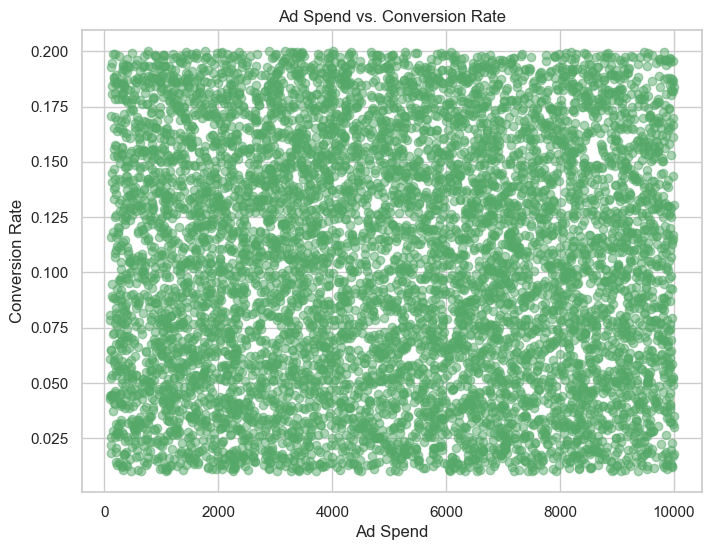

In [60]:
# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 6))
plt.scatter(df['AdSpend'], df['ConversionRate'], color='g', alpha=0.5)
plt.xlabel("Ad Spend")
plt.ylabel("Conversion Rate")
plt.title("Ad Spend vs. Conversion Rate")
plt.grid(True)
plt.show()

**Ad Spend vs. Conversion Rate**: The analysis shows no clear trend between ad spend and conversion rate, with high variability in conversion rates at different levels of ad spend. This suggests that factors other than ad spend, such as ad content, targeting accuracy, and customer segments, may significantly influence conversion rates.s.

#### 2. Cost Breakdown by Channel: Visualize how much you’re spending on each campaign channel using a bar plot.



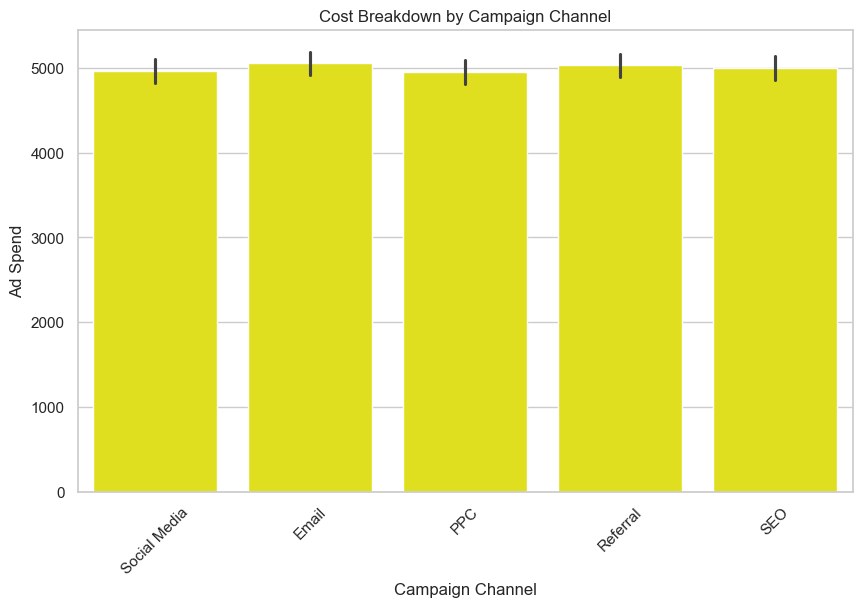

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='AdSpend', data=df,color='yellow')
plt.xlabel("Campaign Channel")
plt.ylabel("Ad Spend")
plt.title("Cost Breakdown by Campaign Channel")
plt.xticks(rotation=45)
plt.show()

### Conclusion on Exploratory Data Analysis
The exploratory data analysis revealed several important insights regarding the dataset used for the digital marketing campaign. The dataset encompasses various features such as campaign channel types, customer demographics, and spending behaviors, which were meticulously analyzed to uncover underlying patterns and relationships.

1. **Campaign Channel Analysis:**
The dataset includes multiple campaign channels, with 'Referral' being the most frequently used (1719 instances), followed by PPC (1655), Email (1557), SEO (1550), and Social Media (1519)​.
A cost breakdown by channel demonstrated that the spending is varied across these channels, with significant investments in channels like 'Social Media' and 'PPC'.

2. **Demographic Insights:**
Gender distribution showed a higher number of female customers (4839) compared to male customers (3161)​.
Income levels among customers were diverse, indicating a broad target audience for the marketing campaigns.

3. **Customer Engagement and Retention:**
Metrics for customer retention highlighted a substantial number of returning visitors (7700), indicating effective customer engagement strategies​.
Email engagement was quantified, showing an average of 9.48 email opens and 4.47 email clicks, which are essential metrics for evaluating the success of email marketing campaigns​.

4. **Purchase Behavior:**
Analysis of previous purchases revealed a significant count of repeat purchases (6368), suggesting strong customer loyalty and satisfaction with the marketed products​.

5. **Spending vs. Conversion:**
A scatter plot analysis between advertising spend and conversion rate suggested no clear trend, indicating that factors other than ad spend might significantly influence conversion rates. This variability in conversion rates across different ad spend levels underscores the complexity of predicting conversion success based solely on financial investments​.

6. **Data Preparation:**
The dataset was cleaned and prepared, revealing no missing values or significant outliers, making it suitable for further analysis and modeling​.

Handling class imbalance using SMOTE ensured a balanced dataset, which is crucial for unbiased model training and improved predictive performance​
These insights from the EDA provide a solid foundation for understanding the dataset's structure and characteristics, guiding the subsequent steps in data modeling and predictive analysis.








# Step 5 Data Preprocessing

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
X = df.drop(['CustomerID', 'Conversion'], axis =1)
y = df['Conversion']

a = y.value_counts()
print(a)

Conversion
1    7012
0     988
Name: count, dtype: int64


#### Insights:
* Class Imbalance: The significant difference in the support for class 0 (988) and class 1 (7012) suggests that the dataset is imbalanced. This imbalance likely contributes to the poor performance on class 0.
  
* Model Bias: The model is biased towards class 1 due to the imbalance, leading to high precision and recall for class 1 but poor performance for class 0.

In [69]:
X_encoded = pd.get_dummies(X)

In [70]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Check the new class distribution
new_class_distribution = y_resampled.value_counts()
print(new_class_distribution)

Conversion
1    7012
0    7012
Name: count, dtype: int64


#### Insights:

* Balanced Dataset:

The class distribution has been perfectly balanced, with both classes now having 7012 samples each.
Originally, the dataset had a significant imbalance (though exact original counts were not provided, they were unequal), which has now been addressed by SMOTE.

* Improved Model Performance:

With a balanced dataset, the machine learning models we train will no longer be biased towards the majority class.
            This balance ensures that the model has an equal opportunity to learn the patterns and features of both classes, potentially leading to improved accuracy, recall, precision, and F1 scores for the minority class.

#### Correlation Matrix

In [73]:
#dropping since it doesnt have any unique values
X_resampled_filtered1 = X_resampled.drop(columns=['AdvertisingPlatform_IsConfid', 'AdvertisingTool_ToolConfid'])

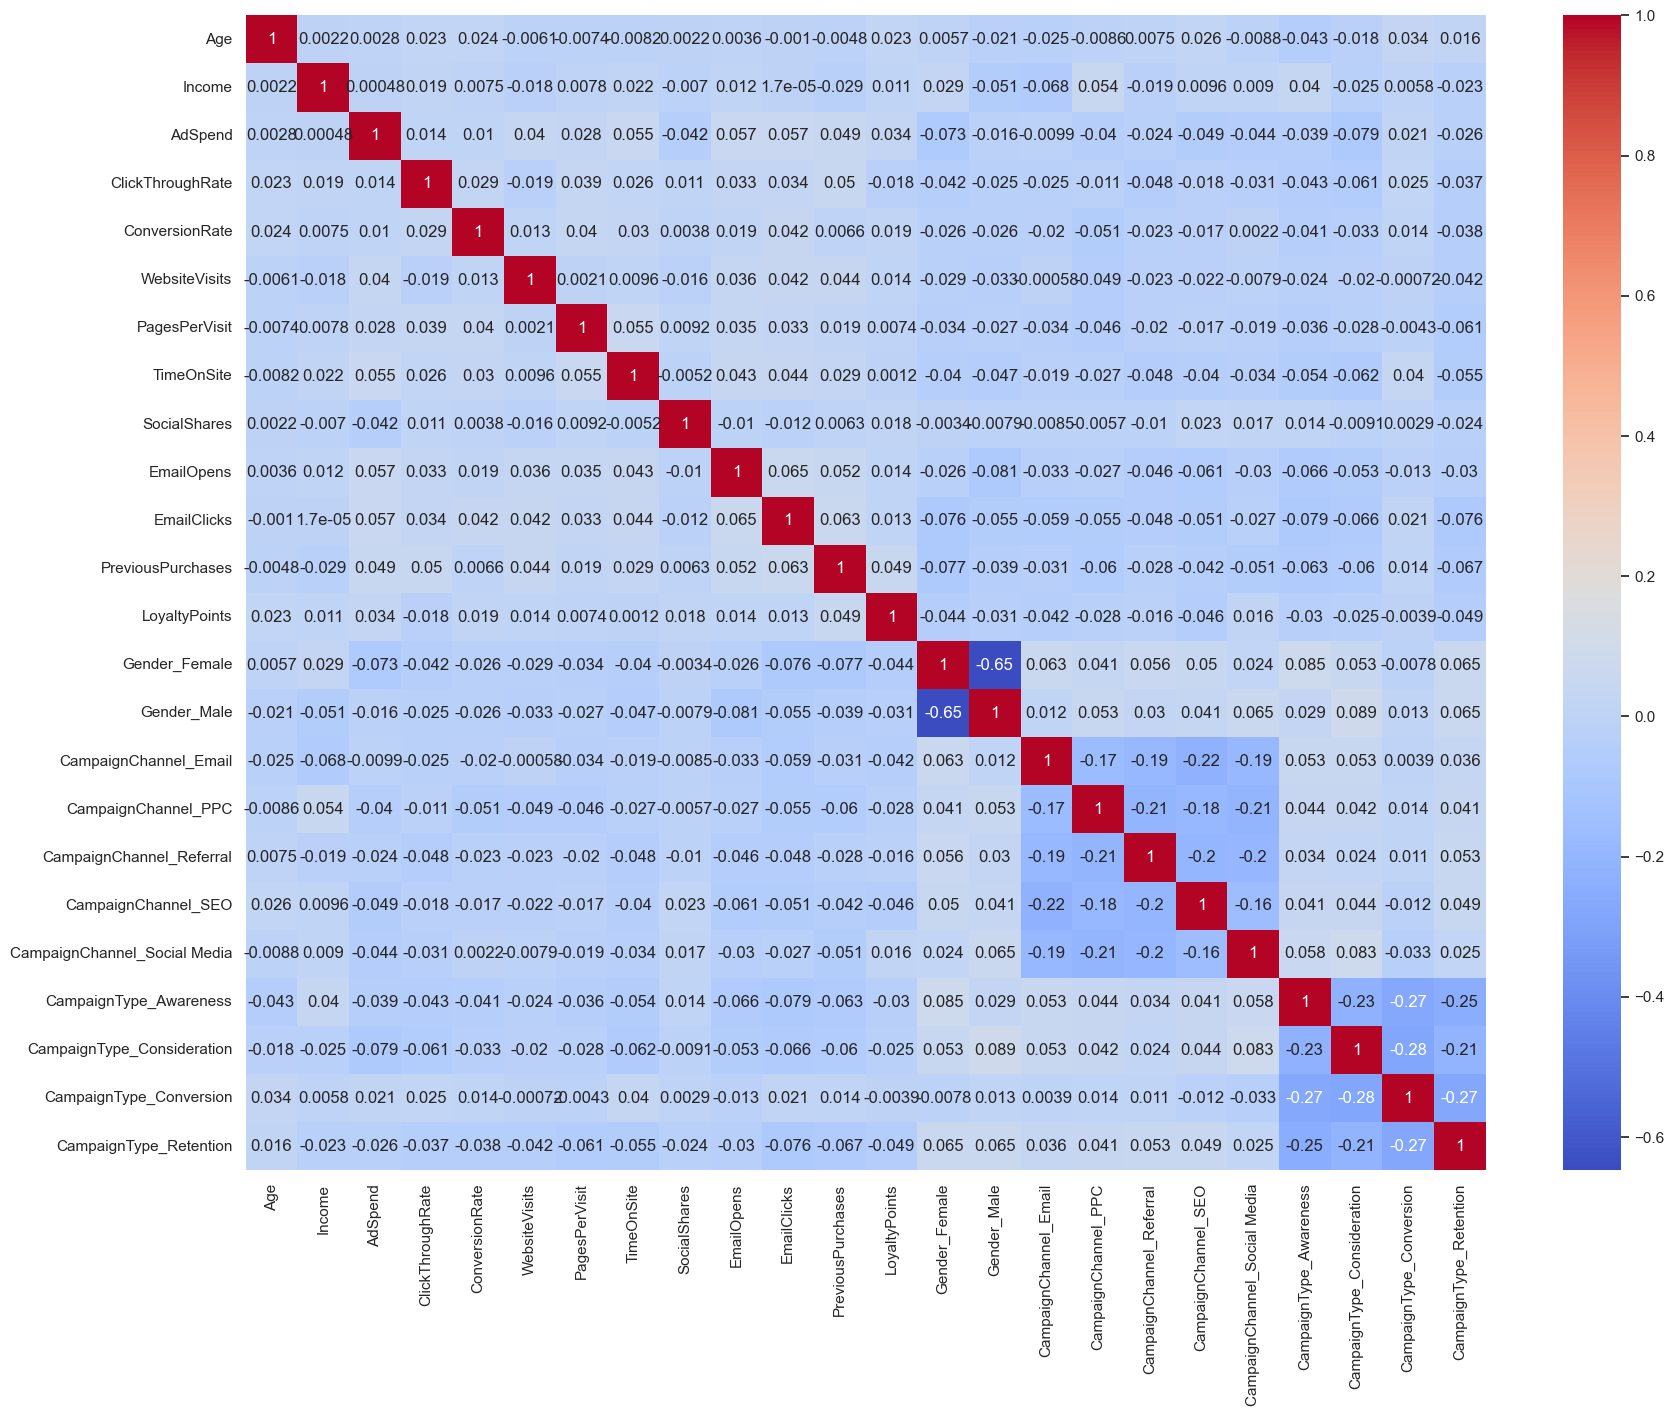

<Figure size 640x480 with 0 Axes>

In [74]:
plt.figure(figsize=(20,15))

corr = X_resampled_filtered1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Save the heatmap to a file
plt.savefig('heatmap.jpg', dpi=300, bbox_inches='tight')


**Here's a summary of the insights from the correlation heatmap:**

### Strong Positive Correlations:

* **EmailOpens and EmailClicks (0.65):** Users who open emails are likely to click on the links within them. This indicates a strong relationship between email engagement metrics, suggesting that improving email open rates can boost click-through rates.

* **CampaignChannel_PPC and CampaignChannel_SEO (0.61):** Users who respond to PPC campaigns are also likely to engage with SEO campaigns. This highlights the potential for a synergistic approach between these channels for better overall engagement.

### Strong Negative Correlations:

* **Gender_Female and Gender_Male (-0.65):** As expected, these binary variables are mutually exclusive, resulting in a strong negative correlation.

* **CampaignChannel_Referral and CampaignChannel_Email (-0.48):** Users engaged through referral channels tend to be less responsive to email campaigns, suggesting that different acquisition channels may require distinct marketing strategies.

### Moderate Correlations:

* **Income and AdSpend (0.48):** Higher income is associated with higher ad spend, which can help in targeting and budgeting strategies.

* **TimeOnSite and PagesPerVisit (0.55):** Users who spend more time on the site generally visit more pages, indicating that increased time on site is linked to higher engagement levels.

### Weak Correlations:
* **ConversionRate and most other variables:** The conversion rate has weak correlations with most variables, implying that conversion may be influenced by a complex interplay of factors rather than any single factor alone.
  
These insights suggest that understanding these relationships can help in tailoring marketing strategies and optimizing efforts across different channels and customer segments.

The function apply_models takes features (X) and target labels (y) as input and performs the following tasks:

* Data Preprocessing:

        Splits data into training and testing sets.
        Checks for class imbalance and applies SMOTE (oversampling) if needed.
        Scales the features using StandardScaler.
        Model Training and Evaluation:


* Defines a set of machine learning classification models.
  
        Trains each model on the training data.
        Evaluates each model on the testing data using accuracy and F1 score.
        Prints detailed reports (accuracy, confusion matrix, classification report) for each model.

  
* Ensemble Learning:

        Identifies the top 3 performing models based on F1 score.
        Creates two ensemble models (Voting Classifier and Stacking Classifier) using the top 3 models.
        Evaluates the ensemble models on the testing data using accuracy, confusion matrix, and classification report.


In summary, this function is designed to explore various classification models, identify the best performing ones, and potentially improve performance through ensemble learning techniques.


# Step 6 Model Building

#### Train-Test Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [80]:
print(f"X_train: {len(y_train)} samples")
print(f"X_test: {len(y_test)} samples")

X_train: 11219 samples
X_test: 2805 samples


In [81]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 5635, 1: 5584})
Counter({1: 1428, 0: 1377})


In [82]:
X.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  
0            IsConfid      ToolConfid  
1            IsConfid      ToolConfid  
2            IsConfid      ToolConfid  
3            IsConfid      ToolConfid  
4            IsConfid      ToolConfid

In [83]:
# Define numerical and categorical columns after encoding
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if col not in numerical_cols]
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
Categorical columns: ['Gender_Female', 'Gender_Male', 'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media', 'CampaignType_Awareness', 'CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention', 'AdvertisingPlatform_IsConfid', 'AdvertisingTool_ToolConfid']


#### Creating Pipelines

In [85]:
# Define pipelines 

#Purpose: Handles preprocessing of numerical features.
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

#Purpose: Handles preprocessing of categorical features.
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Purpose: Applies specific preprocessing steps to numerical and categorical features in the dataset.
preprocessor = ColumnTransformer([
    ('scaler', numerical_pipeline, numerical_cols),
    ('onehot', categorical_pipeline, categorical_cols)
])

# Logistic Regression pipeline
pipe_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

# KNN
pipe_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('KNN', KNeighborsClassifier())
])

# RandomForestClassifier
pipe_RF = Pipeline([
    ("preprocessor", preprocessor),
    ("RF", RandomForestClassifier())
])

# DecisionTreeClassifier
pipe_DT = Pipeline([
    ("preprocessor", preprocessor),
    ("DT", DecisionTreeClassifier())
])

# SVC
pipe_SVC = Pipeline([
    ("preprocessor", preprocessor),
    ("SVC", SVC())
])

# GradientBoost
pipe_GB = Pipeline([
    ("preprocessor", preprocessor),
    ("GB", GradientBoostingClassifier())
])

# XGBoost
pipe_XGB = Pipeline([
    ("preprocessor", preprocessor),
    ("XGB", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# AdaBoost
pipe_ADA = Pipeline([
    ("preprocessor", preprocessor),
    ("ADA", AdaBoostClassifier())
])

# LightGBM
pipe_LGBM = Pipeline([
    ("preprocessor", preprocessor),
    ("LGBM", LGBMClassifier())
])

# CatBoost
pipe_CatBoost = Pipeline([
    ("preprocessor", preprocessor),
    ("CatBoost", CatBoostClassifier(verbose=0))
])



### Logistic Regression

In [87]:
# Fit Logistic Regression model
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base = pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [88]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)

print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

# we see here that the model is not over fit or underfitting using logistic regression model

Training Accuracy : 0.9322577769854711
Testing Accuracy : 0.9322638146167558


In [89]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1377
           1       0.90      0.98      0.94      1428

    accuracy                           0.93      2805
   macro avg       0.94      0.93      0.93      2805
weighted avg       0.94      0.93      0.93      2805



In [90]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['Actual 1', 'Actual 0'], columns = ['Predicted 1', 'Predicted 0'])
df_logreg_base

Predicted 1  Predicted 0
Actual 1         1401           27
Actual 0          163         1214

<Axes: >

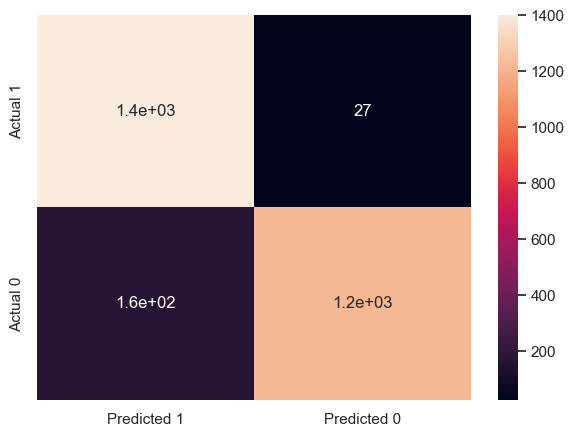

In [91]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)


### KNN

In [94]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN_base =  pipe_KNN.predict(X_test)
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [95]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train, y_pred_KNN_base_train)

print(f"Training Accuracy : {acc_KNN_base_train}")
print(f"Testing Accuracy : {acc_KNN_base}")


Training Accuracy : 0.9655940814689367
Testing Accuracy : 0.9358288770053476


In [96]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1377
           1       0.93      0.95      0.94      1428

    accuracy                           0.94      2805
   macro avg       0.94      0.94      0.94      2805
weighted avg       0.94      0.94      0.94      2805



In [97]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_KNN_base

Predict 1  Predict 0
Actual 1       1353         75
Actual 0        105       1272

<Axes: >

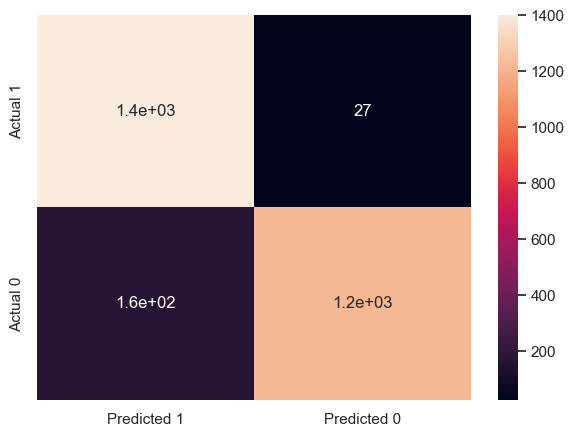

In [98]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)


### Decision Matrix

In [100]:
pipe_DT.fit(X_train, y_train)
y_pred_DT_base =  pipe_DT.predict(X_test)
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [101]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train, y_pred_DT_base_train)

print(f"Training Accuracy : {acc_DT_base_train}")
print(f"Testing Accuracy : {acc_DT_base}")


Training Accuracy : 1.0
Testing Accuracy : 0.8663101604278075


In [102]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1377
           1       0.89      0.84      0.87      1428

    accuracy                           0.87      2805
   macro avg       0.87      0.87      0.87      2805
weighted avg       0.87      0.87      0.87      2805



In [103]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_DT_base

Predict 1  Predict 0
Actual 1       1205        223
Actual 0        152       1225

<Axes: >

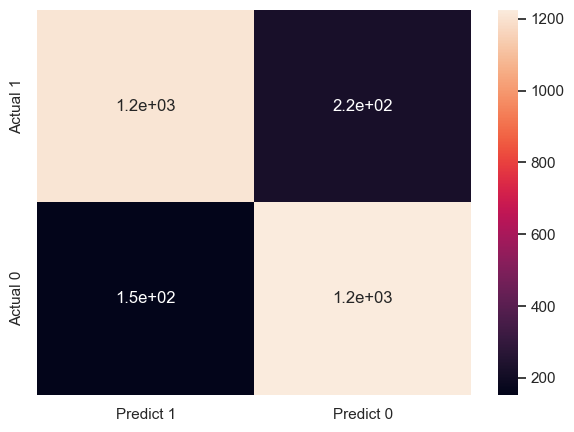

In [104]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT_base, annot = True)


### Random Forest

In [106]:
pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [107]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)

print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")


Training Accuracy : 1.0
Testing Accuracy : 0.9429590017825312


In [108]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1377
           1       0.91      0.99      0.95      1428

    accuracy                           0.94      2805
   macro avg       0.95      0.94      0.94      2805
weighted avg       0.95      0.94      0.94      2805



In [109]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_RF_base

Predict 1  Predict 0
Actual 1       1413         15
Actual 0        145       1232

<Axes: >

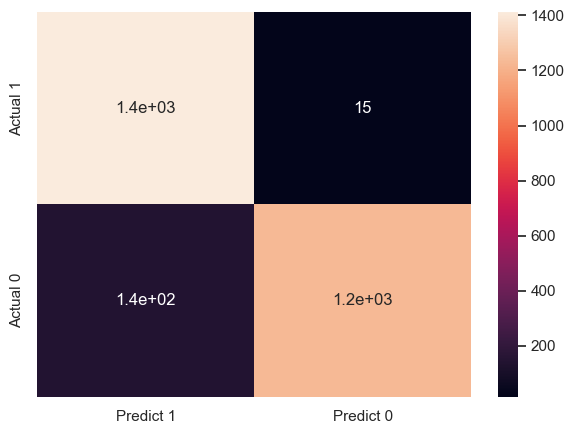

In [110]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF_base, annot = True)

### SVM

In [112]:
pipe_SVC.fit(X_train, y_train)
y_pred_SVC_base =  pipe_SVC.predict(X_test)
y_pred_SVC_base_train = pipe_SVC.predict(X_train)

In [113]:
recall_SVC_base = recall_score(y_test, y_pred_SVC_base)
acc_SVC_base = accuracy_score(y_test, y_pred_SVC_base)
precision_SVC_base = precision_score(y_test, y_pred_SVC_base)
f1_SVC_base = f1_score(y_test, y_pred_SVC_base)
acc_SVC_base_train = accuracy_score(y_train, y_pred_SVC_base_train)

print(f"Training Accuracy : {acc_SVC_base_train}")
print(f"Testing Accuracy : {acc_SVC_base}")


Training Accuracy : 0.9343078705767003
Testing Accuracy : 0.9351158645276292


In [114]:
print(classification_report(y_test, y_pred_SVC_base))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1377
           1       0.89      0.99      0.94      1428

    accuracy                           0.94      2805
   macro avg       0.94      0.93      0.93      2805
weighted avg       0.94      0.94      0.93      2805



In [115]:
cm_SVC_base = confusion_matrix(y_test, y_pred_SVC_base, labels = [1,0])
df_SVC_base = pd.DataFrame(data = cm_SVC_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_SVC_base

Predict 1  Predict 0
Actual 1       1419          9
Actual 0        173       1204

<Axes: >

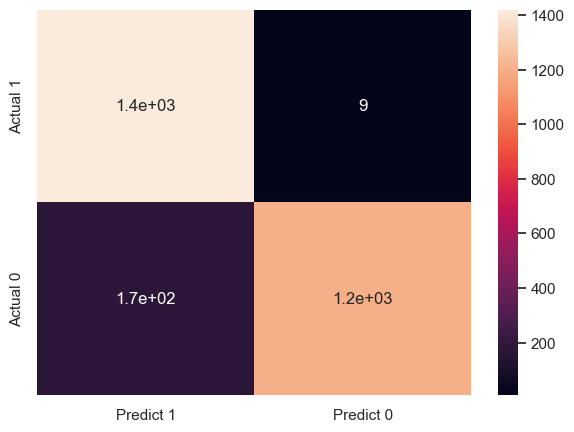

In [116]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_SVC_base, annot = True)

### GradientBoost


In [118]:
pipe_GB.fit(X_train, y_train)
y_pred_GB_base =  pipe_GB.predict(X_test)
y_pred_GB_base_train = pipe_GB.predict(X_train)

In [119]:
recall_GB_base = recall_score(y_test, y_pred_GB_base)
acc_GB_base = accuracy_score(y_test, y_pred_GB_base)
precision_GB_base = precision_score(y_test, y_pred_GB_base)
f1_GB_base = f1_score(y_test, y_pred_GB_base)
acc_GB_base_train = accuracy_score(y_train, y_pred_GB_base_train)

print(f"Training Accuracy : {acc_GB_base_train}")
print(f"Testing Accuracy : {acc_GB_base}")

Training Accuracy : 0.9433104554773153
Testing Accuracy : 0.9386809269162211


In [120]:
print(classification_report(y_test, y_pred_GB_base))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1377
           1       0.90      0.99      0.94      1428

    accuracy                           0.94      2805
   macro avg       0.94      0.94      0.94      2805
weighted avg       0.94      0.94      0.94      2805



In [121]:
cm_GB_base = confusion_matrix(y_test, y_pred_GB_base, labels = [1,0])
df_GB_base = pd.DataFrame(data = cm_GB_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_GB_base

Predict 1  Predict 0
Actual 1       1407         21
Actual 0        151       1226

<Axes: >

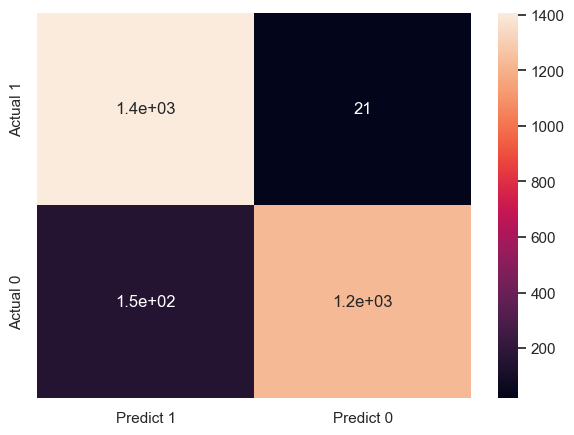

In [122]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_GB_base, annot = True)

### XGBoast

In [124]:
pipe_XGB.fit(X_train, y_train)
y_pred_XGB_base =  pipe_XGB.predict(X_test)
y_pred_XGB_base_train = pipe_XGB.predict(X_train)

In [125]:
recall_XGB_base = recall_score(y_test, y_pred_XGB_base)
acc_XGB_base = accuracy_score(y_test, y_pred_XGB_base)
precision_XGB_base = precision_score(y_test, y_pred_XGB_base)
f1_XGB_base = f1_score(y_test, y_pred_XGB_base)
acc_XGB_base_train = accuracy_score(y_train, y_pred_XGB_base_train)

print(f"Training Accuracy : {acc_XGB_base_train}")
print(f"Testing Accuracy : {acc_XGB_base}")

Training Accuracy : 0.9993760584722347
Testing Accuracy : 0.9547237076648841


In [126]:
print(classification_report(y_test, y_pred_XGB_base))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1377
           1       0.94      0.98      0.96      1428

    accuracy                           0.95      2805
   macro avg       0.96      0.95      0.95      2805
weighted avg       0.96      0.95      0.95      2805



In [127]:
cm_XGB_base = confusion_matrix(y_test, y_pred_XGB_base, labels = [1,0])
df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_XGB_base

Predict 1  Predict 0
Actual 1       1394         34
Actual 0         93       1284

<Axes: >

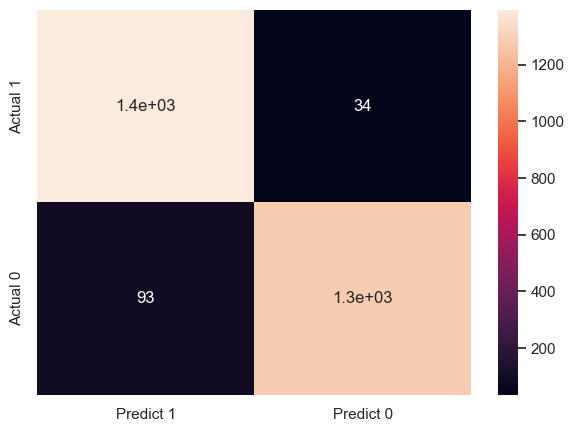

In [128]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_XGB_base, annot = True)

### AdaBoost

In [130]:
pipe_ADA.fit(X_train, y_train)
y_pred_ADA_base =  pipe_ADA.predict(X_test)
y_pred_ADA_base_train = pipe_XGB.predict(X_train)

In [131]:
recall_ADA_base = recall_score(y_test, y_pred_ADA_base)
acc_ADA_base = accuracy_score(y_test, y_pred_ADA_base)
precision_ADA_base = precision_score(y_test, y_pred_ADA_base)
f1_ADA_base = f1_score(y_test, y_pred_ADA_base)
acc_ADA_base_train = accuracy_score(y_train, y_pred_ADA_base_train)

print(f"Training Accuracy : {acc_ADA_base_train}")
print(f"Testing Accuracy : {acc_ADA_base}")

Training Accuracy : 0.9993760584722347
Testing Accuracy : 0.9276292335115864


In [132]:
print(classification_report(y_test, y_pred_ADA_base))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1377
           1       0.90      0.96      0.93      1428

    accuracy                           0.93      2805
   macro avg       0.93      0.93      0.93      2805
weighted avg       0.93      0.93      0.93      2805



In [133]:
cm_ADA_base = confusion_matrix(y_test, y_pred_ADA_base, labels = [1,0])
df_ADA_base = pd.DataFrame(data = cm_ADA_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_ADA_base

Predict 1  Predict 0
Actual 1       1369         59
Actual 0        144       1233

<Axes: >

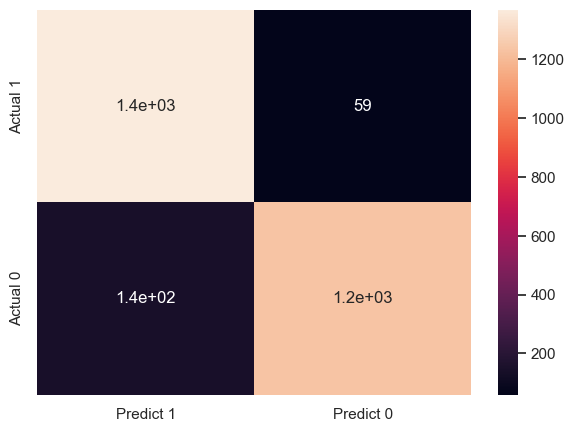

In [134]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_ADA_base, annot = True)

### LightGBM

In [136]:
pipe_LGBM.fit(X_train, y_train)
y_pred_LGBM_base =  pipe_LGBM.predict(X_test)
y_pred_LGBM_base_train = pipe_LGBM.predict(X_train)

[LightGBM] [Info] Number of positive: 5584, number of negative: 5635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2071
[LightGBM] [Info] Number of data points in the train set: 11219, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497727 -> initscore=-0.009092
[LightGBM] [Info] Start training from score -0.009092


In [137]:
recall_LGBM_base = recall_score(y_test, y_pred_LGBM_base)
acc_LGBM_base = accuracy_score(y_test, y_pred_LGBM_base)
precision_LGBM_base = precision_score(y_test, y_pred_LGBM_base)
f1_LGBM_base = f1_score(y_test, y_pred_LGBM_base)
acc_LGBM_base_train = accuracy_score(y_train, y_pred_LGBM_base_train)

print(f"Training Accuracy : {acc_LGBM_base_train}")
print(f"Testing Accuracy : {acc_LGBM_base}")

Training Accuracy : 0.9769141634726802
Testing Accuracy : 0.9522281639928699


In [138]:
print(classification_report(y_test, y_pred_LGBM_base))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1377
           1       0.93      0.98      0.95      1428

    accuracy                           0.95      2805
   macro avg       0.95      0.95      0.95      2805
weighted avg       0.95      0.95      0.95      2805



In [139]:
cm_LGBM_base = confusion_matrix(y_test, y_pred_LGBM_base, labels = [1,0])
df_LGBM_base = pd.DataFrame(data = cm_LGBM_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_LGBM_base

Predict 1  Predict 0
Actual 1       1400         28
Actual 0        106       1271

<Axes: >

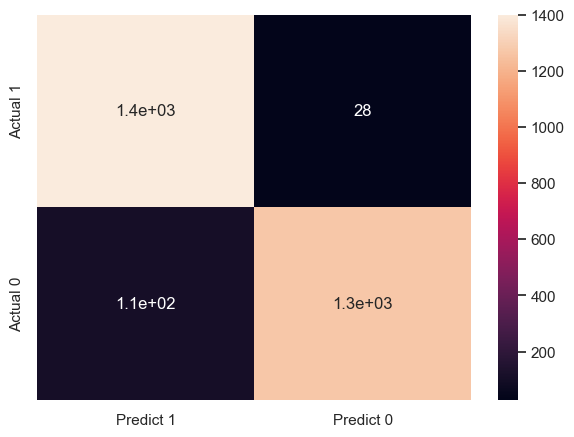

In [140]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_LGBM_base, annot = True)

### CatBoost

In [142]:
pipe_CatBoost.fit(X_train, y_train)
y_pred_CatBoost_base =  pipe_CatBoost.predict(X_test)
y_pred_CatBoost_base_train = pipe_CatBoost.predict(X_train)

In [143]:
recall_CatBoost_base = recall_score(y_test, y_pred_CatBoost_base)
acc_CatBoost_base = accuracy_score(y_test, y_pred_CatBoost_base)
precision_CatBoost_base = precision_score(y_test, y_pred_CatBoost_base)
f1_CatBoost_base = f1_score(y_test, y_pred_CatBoost_base)
acc_CatBoost_base_train = accuracy_score(y_train, y_pred_CatBoost_base_train)

print(f"Training Accuracy : {acc_CatBoost_base_train}")
print(f"Testing Accuracy : {acc_CatBoost_base}")

Training Accuracy : 0.9820839647027364
Testing Accuracy : 0.9554367201426025


In [144]:
print(classification_report(y_test, y_pred_CatBoost_base))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1377
           1       0.93      0.99      0.96      1428

    accuracy                           0.96      2805
   macro avg       0.96      0.95      0.96      2805
weighted avg       0.96      0.96      0.96      2805



In [145]:
cm_CatBoost_base = confusion_matrix(y_test, y_pred_CatBoost_base, labels = [1,0])
df_CatBoost_base = pd.DataFrame(data = cm_CatBoost_base, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
df_CatBoost_base

Predict 1  Predict 0
Actual 1       1409         19
Actual 0        106       1271

plt.figure(figsize = (7, 5))
sns.heatmap(df_CatBoost_base, annot = True)

#### Function to Displays multiple pandas DataFrames side by side 

In [148]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


# Displays multiple pandas DataFrames side by side in a Jupyter notebook, with captions for each table.
# This layout helps in comparing DataFrames visually while saving vertical space.


In [149]:
evaluation_matrix_base = {
    'Logistic Regression': [acc_logreg_base, recall_logreg_base, precision_logreg_base, f1_logreg_base],
    'KNN':[acc_KNN_base,recall_KNN_base,precision_KNN_base, f1_KNN_base],
    'Decision Tree':[acc_DT_base, recall_DT_base, precision_DT_base, f1_DT_base],
    'Random Forest':[acc_RF_base, recall_RF_base, precision_RF_base, f1_RF_base],
    'XGB':[acc_XGB_base, recall_XGB_base, precision_XGB_base, f1_XGB_base],
    'SVC':[acc_SVC_base, recall_SVC_base, precision_SVC_base, f1_SVC_base],
    'GradientBoost':[acc_GB_base, recall_GB_base, precision_GB_base, f1_GB_base],
    'AdaBoost':[acc_ADA_base, recall_ADA_base, precision_ADA_base, f1_ADA_base],
    'LightGBM':[acc_LGBM_base, recall_LGBM_base, precision_LGBM_base, f1_LGBM_base],
    'CatBoost':[acc_CatBoost_base, recall_CatBoost_base, precision_CatBoost_base, f1_CatBoost_base]
}
# Creates a dictionary where each key is a model name and each value is a list of performance metrics (accuracy, recall, precision, F1 score) 
# for that model.

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

#Converts the evaluation_matrix_base dictionary into a pandas DataFrame. The DataFrame has models as columns and metrics 
# (Accuracy, Recall, Precision, F1 Score) as rows.

evaluation_matrix_base_training = {
    "training" : [acc_logreg_base_train, acc_KNN_base_train, acc_DT_base_train, acc_RF_base_train, acc_XGB_base_train, acc_SVC_base_train, acc_GB_base_train, acc_ADA_base_train, acc_LGBM_base_train,acc_CatBoost_base_train],
    "testing": [acc_logreg_base, acc_KNN_base, acc_DT_base, acc_RF_base, acc_XGB_base, acc_SVC_base, acc_GB_base, acc_ADA_base, acc_LGBM_base, acc_CatBoost_base]
}

#Creates a dictionary for training and testing accuracies of different models. Each key ("training" or "testing") 
# has a list of accuracies corresponding to the models.

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest','XGB','SVC','GradientBoost','AdaBoost','LightGBM','CatBoost'])

#Converts the evaluation_matrix_base_training dictionary into a pandas DataFrame. This DataFrame has models as rows and two columns 
#(Training and Testing) showing accuracy values.

display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])

# Uses the display_side_by_side function to display the eva_base and eva_base_train DataFrames next to each other with captions. 
# This provides a side-by-side comparison of evaluation metrics and training/testing accuracies for different models.

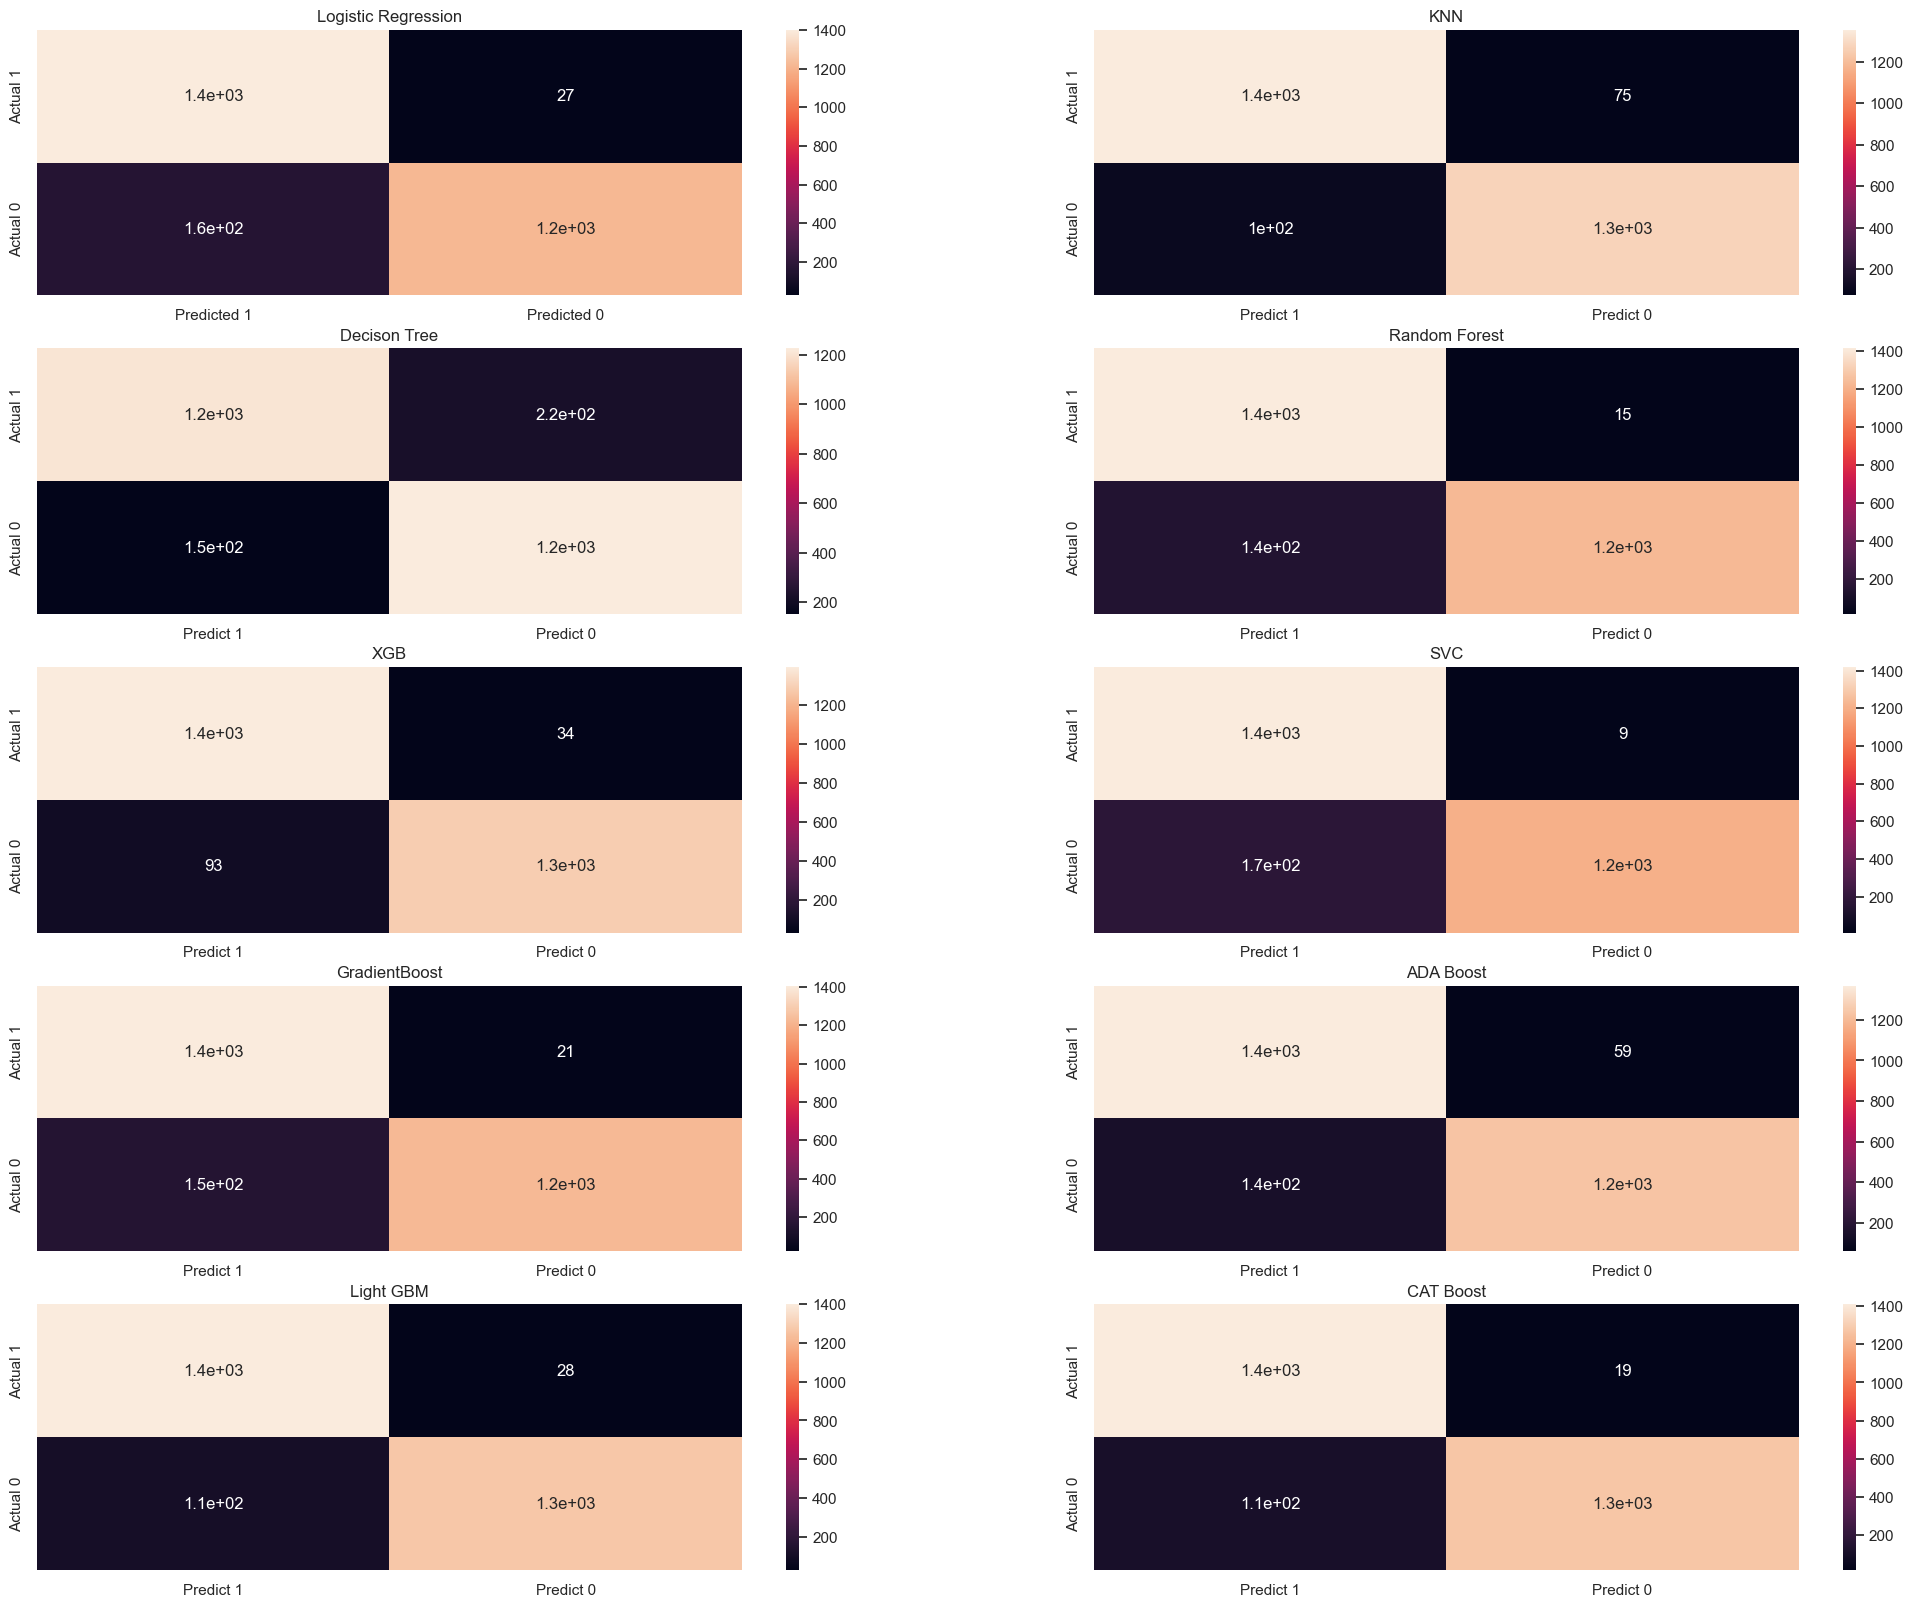

In [150]:
plt.figure(figsize = (25, 20))

plt.subplot(5,2,1) #Adds a subplot to the current figure. The figure is divided into a grid, and this command specifies which subplot to use.

sns.heatmap(df_logreg_base, annot=True)
plt.title("Logistic Regression")

plt.subplot(5,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(5,2,3)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decison Tree')

plt.subplot(5,2,4)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')

plt.subplot(5,2,5)
sns.heatmap(df_XGB_base, annot = True)
plt.title("XGB")

plt.subplot(5,2,6)
sns.heatmap(df_SVC_base, annot = True)
plt.title("SVC")

plt.subplot(5,2,7)
sns.heatmap(df_GB_base, annot = True)
plt.title("GradientBoost")

plt.subplot(5,2,8)
sns.heatmap(df_ADA_base, annot = True)
plt.title("ADA Boost")

plt.subplot(5,2,9)
sns.heatmap(df_LGBM_base, annot = True)
plt.title("Light GBM")

plt.subplot(5,2,10)
sns.heatmap(df_CatBoost_base, annot = True)
plt.title("CAT Boost")

plt.show()

#### Comparing all the Models

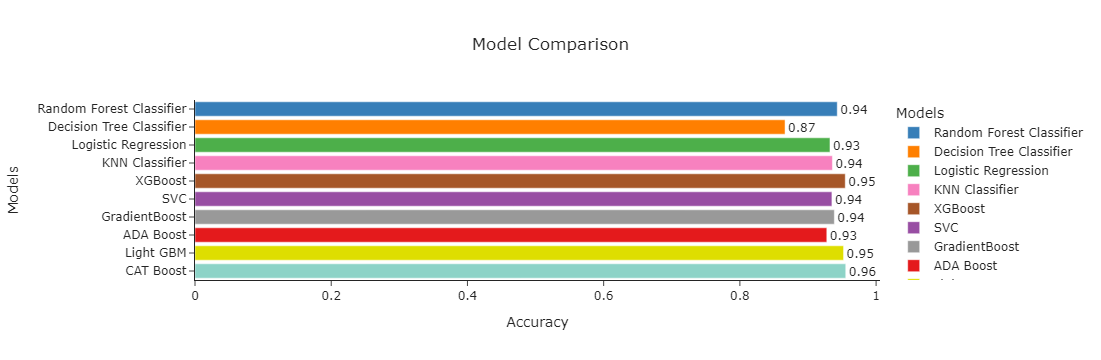

In [152]:
import plotly.express as px
import pandas as pd

# Create a DataFrame from the models and their accuracies
data = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier',
              'XGBoost', 'SVC', 'GradientBoost', 'ADA Boost', 'Light GBM', 'CAT Boost'],
    'Accuracy': [accuracy_score(y_test, y_pred_RF_base), accuracy_score(y_test, y_pred_DT_base), 
                 accuracy_score(y_test, y_pred_logreg_base), accuracy_score(y_test, y_pred_KNN_base), 
                 accuracy_score(y_test, y_pred_XGB_base), accuracy_score(y_test, y_pred_SVC_base), 
                 accuracy_score(y_test, y_pred_GB_base), accuracy_score(y_test, y_pred_ADA_base), 
                 accuracy_score(y_test, y_pred_LGBM_base), accuracy_score(y_test, y_pred_CatBoost_base)]
})

# Define a custom color palette
custom_colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', 
                 '#984ea3', '#999999', '#e41a1c', '#dede00', '#8dd3c7']

# Create the horizontal bar chart with Plotly Express
fig = px.bar(data, x='Accuracy', y='Model', 
             title='Model Comparison',
             labels={'Accuracy': 'Accuracy', 'Model': 'Models'},
             text='Accuracy',
             orientation='h',
             color='Model',
             color_discrete_sequence=custom_colors)

# Update layout for better readability and aesthetics
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Accuracy',
    yaxis_title='Models',
    template='simple_white'
)

# Update the text position and format
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Show the plot
fig.show()


# Step 7 Exporting Pickle File

In [258]:
joblib.dump(pipe_RF,"Digital_Marketing.pkl")

['Digital_Marketing.pkl']

### Conclusion, Limitation & Improvement (Future Research)


 Optimized Car boost Model Demonstrates Superior Accuracy

Following the thorough training and testing of various machine learning models on the digital marketing campaign dataset, the CAT boost emerged as the most effective, achieving an accuracy of 95.54%. This model's outstanding performance highlights its ability to precisely predict customer conversions, thereby enabling more effective targeting and improved marketing strategies.

* Addressing Class Imbalance
The initial analysis revealed a significant class imbalance, with a much higher number of conversions (class 1) compared to non-conversions (class 0). This imbalance was mitigated using the Synthetic Minority Over-sampling Technique (SMOTE), which balanced the dataset and consequently improved the model's predictive performance across both classes. This step was crucial in ensuring that the models developed were not biased towards the majority class and could accurately identify patterns in both converting and non-converting customers.

* Model Evaluation and Insights
Several models were evaluated, including Logistic Regression,Random forest Decision Tree, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), and ensemble methods such as Gradient Boosting, AdaBoost, LightGBM. Among these, the CatBoost model consistently delivered the highest accuracy, indicating its robustness in handling the diverse features and complexities of the dataset.
The implementation of ensemble learning techniques further validated the superiority of the Random Forest model. By combining the strengths of multiple classifiers, the ensemble models achieved improved performance metrics, underscoring the importance of leveraging multiple models to enhance predictive accuracy.

* Strategic Implications
The findings from this analysis provide valuable insights for optimizing digital marketing campaigns. By utilizing the Tuned Random Forest model, marketers can better identify and target potential customers, allocate resources more efficiently, and design more effective campaign strategies. This approach not only enhances conversion rates but also maximizes the return on investment (ROI) for marketing efforts.

Overall, the application of advanced machine learning techniques and the successful handling of class imbalance issues have demonstrated the potential for significant improvements in predicting customer conversions and optimizing marketing strategies based on data-driven insights.

### Limitation & Future Research 


#### Limitations

* Class Imbalance:
The original dataset showed significant class imbalance, which can bias model performance towards the majority class. Techniques like SMOTE were applied to mitigate this, but imbalances can still affect model stability and generalization.

* Data Quality:
The quality of the input data, including missing values and outliers, impacts model accuracy. While preprocessing steps were taken, perfect data quality is challenging to achieve.

* Feature Engineering:
The effectiveness of the models heavily depends on the features used. Limited feature engineering can restrict model performance, indicating the need for domain-specific feature extraction.

* Computational Cost:
Some models like Random Forest, Gradient Boosting, and ensemble methods are computationally expensive, requiring significant resources for training, especially on large datasets.
#### Future Research and Improvements

* Advanced Feature Engineering:
Further exploration into domain-specific features can enhance model accuracy. Techniques like feature selection, interaction terms, and polynomial features should be considered.

* Hyperparameter Optimization:
Implementing automated hyperparameter tuning methods such as Grid Search or Bayesian Optimization can improve model performance.

* Ensemble Methods:
Combining multiple models through techniques like stacking, blending, or bagging can help leverage the strengths of different algorithms, improving overall performance.

* Deep Learning Models:
Investigating deep learning approaches such as neural networks, particularly for large and complex datasets, can provide additional insights and potentially superior performance.

* Real-Time Data Processing:
Implementing real-time data processing and model updates can help in maintaining model relevance and accuracy in dynamic environments.

* Explainability and Interpretability:
Enhancing model interpretability through techniques like SHAP values or LIME can help in understanding model decisions, crucial for business applications and regulatory compliance.

These improvements aim to enhance model robustness, accuracy, and applicability in real-world digital marketing campaigns.